**Hello

# Effect ando correction of segregation error in coal size distribution estimation by image analysis on a conveyor belt

In [85]:
# Operaciones de los datos
import pandas as pd
import numpy as np
import math

# Visualización
import matplotlib.pyplot as plt
# import seaborn as sns
# import missingno as msno

# Regresión lineal
from scipy.optimize import curve_fit
# import statsmodels.api as sm
from scipy.interpolate import interp1d

from sklearn.metrics import r2_score

In [86]:
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (18,10)

# Procesamiento de Datos Laboratorio

In [87]:
def normalizate(df : pd.DataFrame):
    normalized_df=(df-df.min())/(df.max()-df.min())
    return normalized_df

In [88]:
data = pd.read_csv("datos de laboratorio/17-22_marzo_2022.csv",
                   sep = ',',
                   index_col = 0,
                   encoding='utf-8')

data.index = pd.to_datetime(data.index, format = '%d/%m/%Y %H:%M')
data.tail()

,"+1/2""",0.375,0.25,+ m 4,+ m 6,+ m 8,+ m 10,+ m 16,+ m 20,+ m 40,+ m 50,+ m 70,+ m 100,+m 140,+m 200,+m 270,+m 325,+m 400,-m 400
date,,,,,,,,,,,,,,,,,,,
2022-04-03 09:05:00,73.5,94.0,94.6,98.3,101.8,124.1,17.7,227.6,104.2,178.4,87.4,66.7,46.9,34.1,53.2,30.9,12.9,11.2,83.2
2022-04-04 09:00:00,101.8,153.5,195.7,125.0,123.6,127.4,21.0,245.3,109.1,184.7,90.3,68.1,49.9,34.4,53.2,33.1,16.1,10.8,84.0
2022-04-05 08:50:00,34.1,87.6,103.1,95.1,109.4,153.3,30.3,294.1,124.1,185.1,81.8,57.8,41.3,27.8,40.5,31.5,17.0,6.5,78.8
2022-04-06 08:05:00,82.7,98.4,128.4,135.4,121.2,130.6,20.1,268.1,126.9,194.7,88.1,64.9,46.4,36.0,50.5,44.2,20.4,11.1,89.6
2022-04-07 08:45:00,106.4,112.4,139.1,95.8,96.0,111.9,22.4,227.6,102.2,150.1,64.4,45.2,31.7,23.6,31.3,23.9,12.2,5.5,61.3


In [89]:
suma_gramaje = data.sum(axis=1)
perc_data = []
for row in range(data.shape[0]):
    prc_row = []
    for n in range(data.shape[1]):
        prcnt = data.iloc[row,n]/suma_gramaje.iloc[row]
        prc_row.append(prcnt)
    perc_data.append(prc_row)

perc_df = pd.DataFrame(perc_data, columns = [data.columns])
perc_df.index = data.index
perc_df.head()

,"+1/2""",0.375,0.25,+ m 4,+ m 6,+ m 8,+ m 10,+ m 16,+ m 20,+ m 40,+ m 50,+ m 70,+ m 100,+m 140,+m 200,+m 270,+m 325,+m 400,-m 400
date,,,,,,,,,,,,,,,,,,,
2022-03-17 09:00:00,0.038893,0.078841,0.104452,0.098375,0.066990,0.059256,0.008788,0.097371,0.052477,0.091220,0.051422,0.042157,0.043563,0.022598,0.036081,0.030808,0.011475,0.006453,0.058779
2022-03-18 08:45:00,0.028982,0.050788,0.058291,0.058993,0.050336,0.053724,0.008632,0.135175,0.087649,0.150984,0.067424,0.049834,0.045293,0.022483,0.031165,0.026322,0.010664,0.006650,0.056609
2022-03-19 08:40:00,0.048932,0.082859,0.103009,0.083411,0.059572,0.055482,0.008908,0.117764,0.064013,0.111741,0.051316,0.040250,0.038067,0.018996,0.029660,0.020903,0.008356,0.006298,0.050463
2022-03-20 08:25:00,0.025806,0.061368,0.087375,0.071826,0.061368,0.061995,0.011135,0.129031,0.071601,0.129934,0.061168,0.045694,0.042459,0.020464,0.030421,0.022095,0.008326,0.005216,0.052716
2022-03-21 08:30:00,0.053257,0.063602,0.064054,0.055742,0.047632,0.049666,0.009215,0.122156,0.069402,0.130493,0.063501,0.049967,0.048511,0.023100,0.034375,0.034023,0.008211,0.007357,0.065736


Text(0.5, 1.0, 'F80')

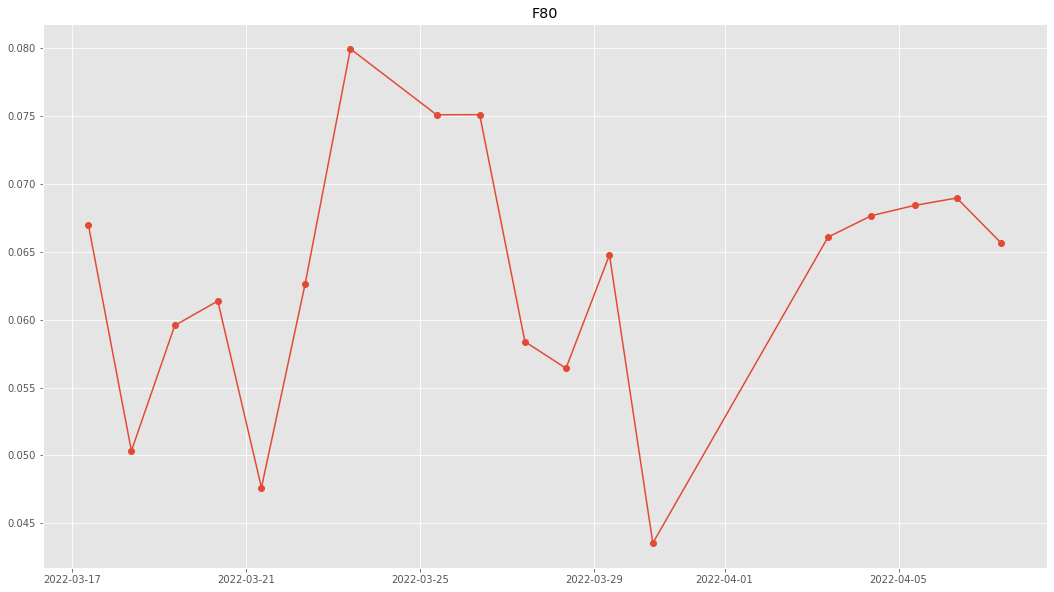

In [90]:

fig, ax = plt.subplots()
ax.plot(perc_df['+ m 6'], '-o', label='cv13')
# ax.plot(cv15_sup.data_inter.f80, '-o', label='cv15')
ax.set_title('F80')

In [91]:
lab_dist_cum = []
for n in range(perc_df.shape[0]):
    cum_tags = np.cumsum(perc_df.iloc[n,::-1])
    lab_dist_cum.append(cum_tags)

lab_dist_cum = pd.DataFrame(lab_dist_cum)
lab_dist_cum.head()

,-m 400,+m 400,+m 325,+m 270,+m 200,+m 140,+ m 100,+ m 70,+ m 50,+ m 40,+ m 20,+ m 16,+ m 10,+ m 8,+ m 6,+ m 4,0.25,0.375,"+1/2"""
2022-03-17 09:00:00,0.058779,0.065232,0.076707,0.107515,0.143596,0.166194,0.209757,0.251915,0.303337,0.394556,0.447033,0.544405,0.553193,0.612449,0.679439,0.777814,0.882266,0.961107,1.0
2022-03-18 08:45:00,0.056609,0.063259,0.073924,0.100246,0.131411,0.153894,0.199187,0.249021,0.316446,0.467429,0.555079,0.690254,0.698886,0.752610,0.802946,0.861939,0.920230,0.971018,1.0
2022-03-19 08:40:00,0.050463,0.056761,0.065118,0.086020,0.115681,0.134677,0.172743,0.212993,0.264310,0.376051,0.440064,0.557828,0.566736,0.622218,0.681790,0.765200,0.868209,0.951068,1.0
2022-03-20 08:25:00,0.052716,0.057932,0.066259,0.088353,0.118774,0.139239,0.181697,0.227391,0.288559,0.418493,0.490094,0.619125,0.630260,0.692256,0.753624,0.825450,0.912825,0.974194,1.0
2022-03-21 08:30:00,0.065736,0.073093,0.081304,0.115327,0.149701,0.172802,0.221313,0.271280,0.334781,0.465274,0.534676,0.656832,0.666047,0.715713,0.763346,0.819088,0.883142,0.946743,1.0


Text(0.5, 1.0, '+ m 40')

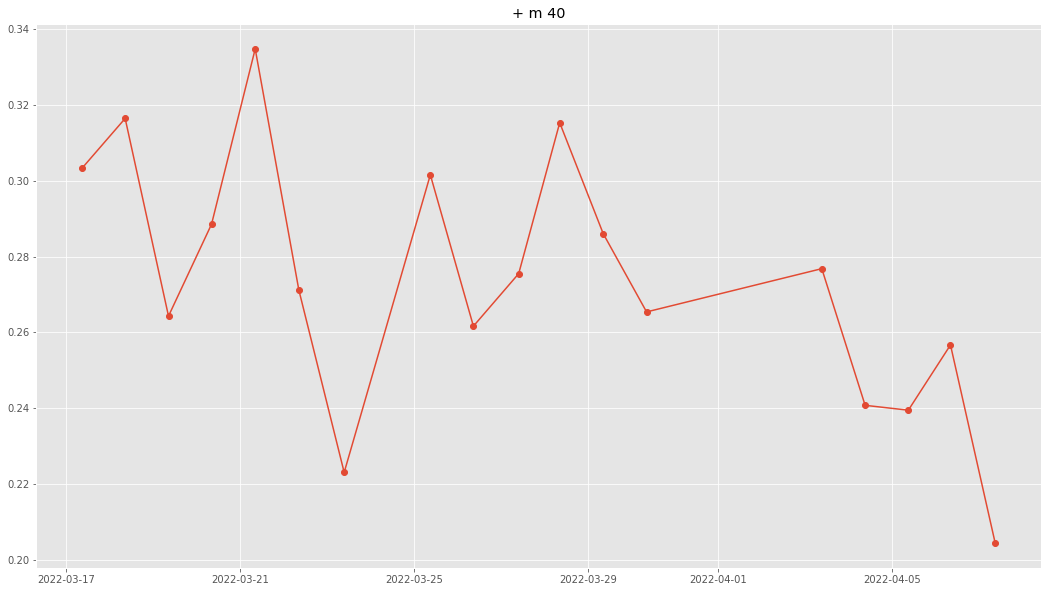

In [92]:
fig, ax = plt.subplots()
ax.plot(lab_dist_cum['+ m 50'], '-o', label='cv13')
# ax.plot(cv15_sup.data_inter.f80, '-o', label='cv15')
ax.set_title('+ m 40')

In [93]:
dsize = np.array([12500,9500,6300,4750,3350,2360,2000,1180,850,425,300,212,150,106,75,53,45,38])
dsize =dsize[::-1]
dsize.shape

(18,)

In [94]:
lab_dist_cum.shape

(18, 19)

Text(0.5, 1.0, '+ m 40')

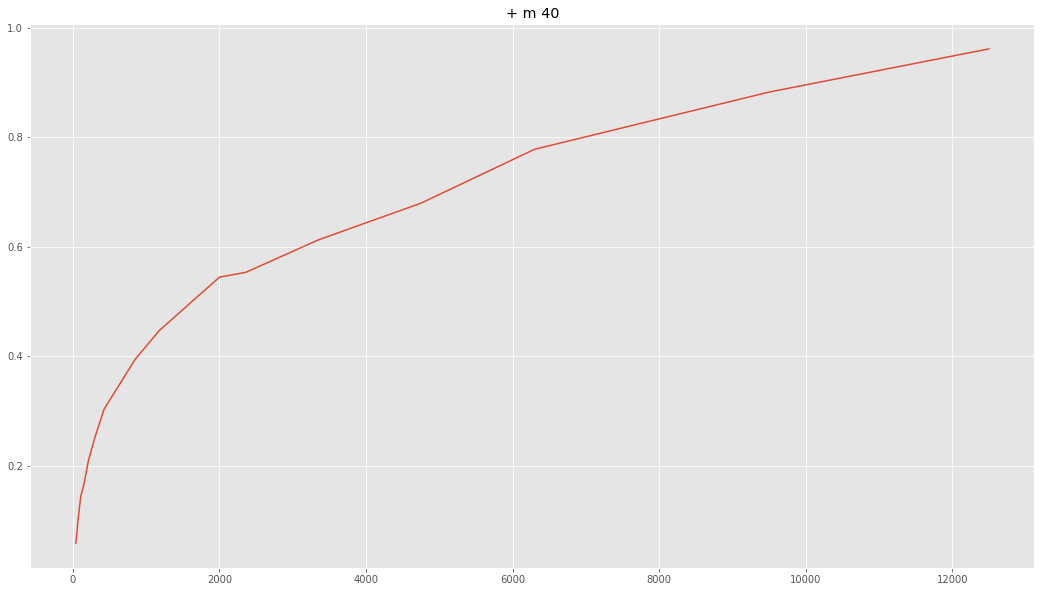

In [95]:
fig, ax = plt.subplots()
ax.plot(dsize, lab_dist_cum.iloc[0,:-1], '-', label='cv13')
# ax.plot(cv15_sup.data_inter.f80, '-o', label='cv15')
ax.set_title('+ m 40')

# Procesamiento de Resultados F80Meter

In [96]:
f80_mtr = pd.read_csv("results_f80/f80_results_2022-04-08.csv",
                   sep = ',',
                   index_col = 0,
                   encoding='utf-8')

f80_mtr.index = pd.to_datetime(f80_mtr.index, format = '%Y-%m-%d %H:%M:%S')
f80_mtr = f80_mtr['2022-03-17':]
f80_mtr.head()

,f100,f90,f80,f70,f60,f50,f40,f30,f20,f10,...,rock_detected,SPEED_CONVYR,TPH_Mineral,NVL_CAJON,POWER_KW,WATER_MILL,BOMBA_CAJON_A,BOMBA_CAJON_B,PWR_BOMBA_CAJON_A,PWR_BOMBA_CAJON_B
date,,,,,,,,,,,,,,,,,,,,,
2022-03-17 10:36:55,12.271677,8.194491,7.170382,6.353655,5.733970,5.185363,4.660387,4.138991,3.549823,2.850291,...,12.383915,1.0,557.8,0.0,0.0,178.73,0.0,0.0,0.0,0.0
2022-03-17 10:36:58,12.271677,8.621830,7.334387,6.403137,5.747967,5.195380,4.680963,4.173214,3.580252,2.883424,...,13.313045,1.0,557.8,0.0,0.0,178.73,0.0,0.0,0.0,0.0
2022-03-17 10:37:01,12.271677,8.742999,7.538453,6.565094,5.800832,5.188549,4.671735,4.168319,3.572526,2.868025,...,12.004733,1.0,557.8,0.0,0.0,178.73,0.0,0.0,0.0,0.0
2022-03-17 10:37:03,12.271677,8.529553,7.437532,6.532384,5.795825,5.178317,4.651582,4.135548,3.545699,2.849252,...,12.859909,1.0,557.8,0.0,0.0,178.73,0.0,0.0,0.0,0.0
2022-03-17 10:37:06,12.271677,8.500872,7.477149,6.585454,5.814985,5.196643,4.669533,4.156656,3.561057,2.859716,...,13.573004,1.0,557.8,0.0,0.0,178.73,0.0,0.0,0.0,0.0


In [97]:
f80_mtr_T = f80_mtr.resample('1T').median()
f80_mtr_5T = f80_mtr.resample('5T').median()
f80_mean_60T = f80_mtr.resample('60T').mean()
f80_mtr_D = f80_mtr.resample('1D').median()

In [98]:
f80_mtr_30TR=f80_mtr_T.rolling(30).mean()

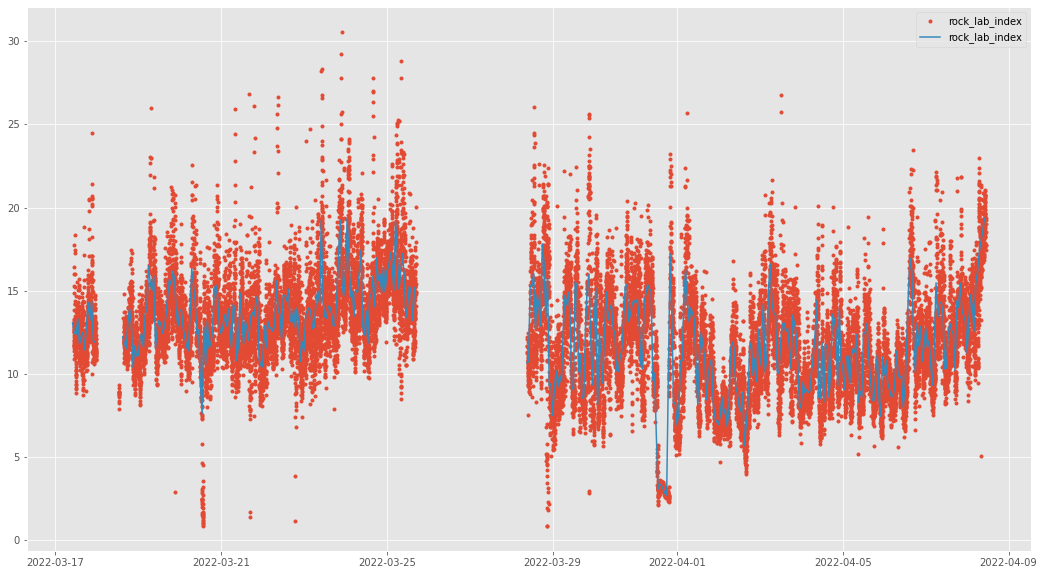

In [99]:
f80_T_norm = normalizate(f80_mtr_T.rock_detected)
fig, ax = plt.subplots()
ax.plot(f80_mtr_T.rock_detected, '.', label='rock_lab_index')
ax.plot(f80_mean_60T.rock_detected, label='rock_lab_index')
ax.legend()

In [100]:
f80_mtr_5T['rock_detected']

date
2022-03-17 10:35:00    12.315339
2022-03-17 10:40:00    14.368568
2022-03-17 10:45:00    13.052413
2022-03-17 10:50:00    12.244075
2022-03-17 10:55:00    12.291584
                         ...    
2022-04-08 10:25:00    19.965645
2022-04-08 10:30:00    18.509426
2022-04-08 10:35:00    18.219213
2022-04-08 10:40:00    18.376645
2022-04-08 10:45:00    19.253335
Freq: 5T, Name: rock_detected, Length: 6339, dtype: float64

C:\Users\Ivan\.conda\envs\f80-2\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:>

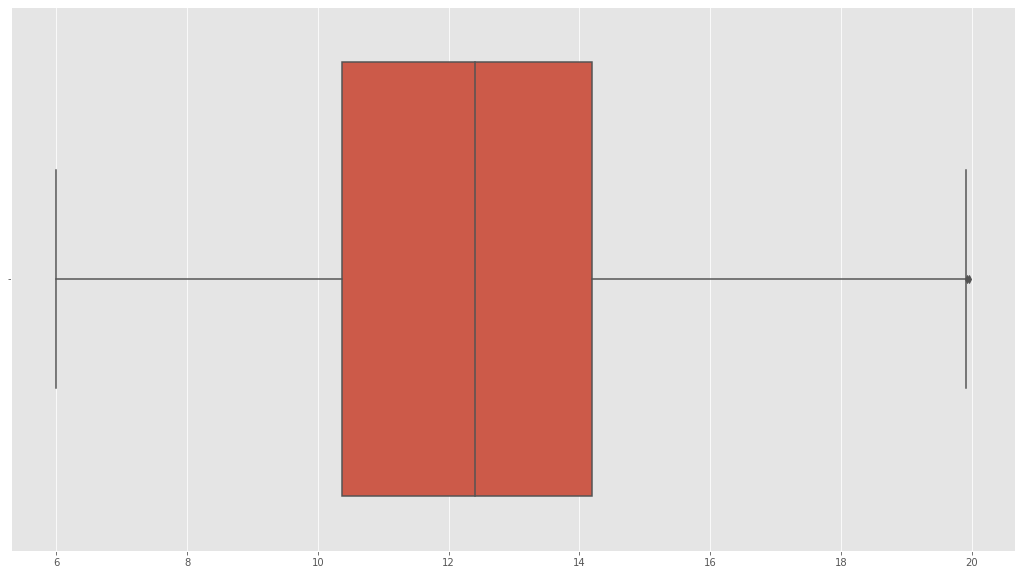

In [101]:
f80_mtr_5T_trim = f80_mtr_5T.where(f80_mtr_5T['rock_detected'] < 20)
f80_mtr_5T_trim = f80_mtr_5T_trim.where(f80_mtr_5T['rock_detected'] > 6)

# Box Plot
import seaborn as sns
sns.boxplot(np.array(f80_mtr_5T_trim.rock_detected))

In [102]:
f80_mtr_240T = f80_mtr_5T_trim.resample('240T').median()
f80_mtr_240T.tail()

,f100,f90,f80,f70,f60,f50,f40,f30,f20,f10,...,rock_detected,SPEED_CONVYR,TPH_Mineral,NVL_CAJON,POWER_KW,WATER_MILL,BOMBA_CAJON_A,BOMBA_CAJON_B,PWR_BOMBA_CAJON_A,PWR_BOMBA_CAJON_B
date,,,,,,,,,,,,,,,,,,,,,
2022-04-07 16:00:00,11.550211,8.624886,7.722412,7.049031,6.377118,5.775757,5.228607,4.655404,4.035990,3.252132,...,12.913077,1.0,557.8,0.0,0.0,178.73,0.0,0.0,0.0,0.0
2022-04-07 20:00:00,11.609885,8.547274,7.598208,6.862348,6.244940,5.672693,5.137138,4.612863,4.004053,3.237309,...,13.740633,1.0,557.8,0.0,0.0,178.73,0.0,0.0,0.0,0.0
2022-04-08 00:00:00,11.581764,8.458087,7.469887,6.751591,6.150442,5.569729,5.018144,4.487532,3.924778,3.175044,...,13.899970,1.0,557.8,0.0,0.0,178.73,0.0,0.0,0.0,0.0
2022-04-08 04:00:00,11.708423,8.512349,7.532067,6.763527,6.153847,5.585971,5.052662,4.500474,3.923896,3.175909,...,14.949218,1.0,557.8,0.0,0.0,178.73,0.0,0.0,0.0,0.0
2022-04-08 08:00:00,11.819280,8.591709,7.575849,6.811035,6.204356,5.648882,5.089187,4.537466,3.915891,3.147973,...,18.376645,1.0,557.8,0.0,0.0,178.73,0.0,0.0,0.0,0.0


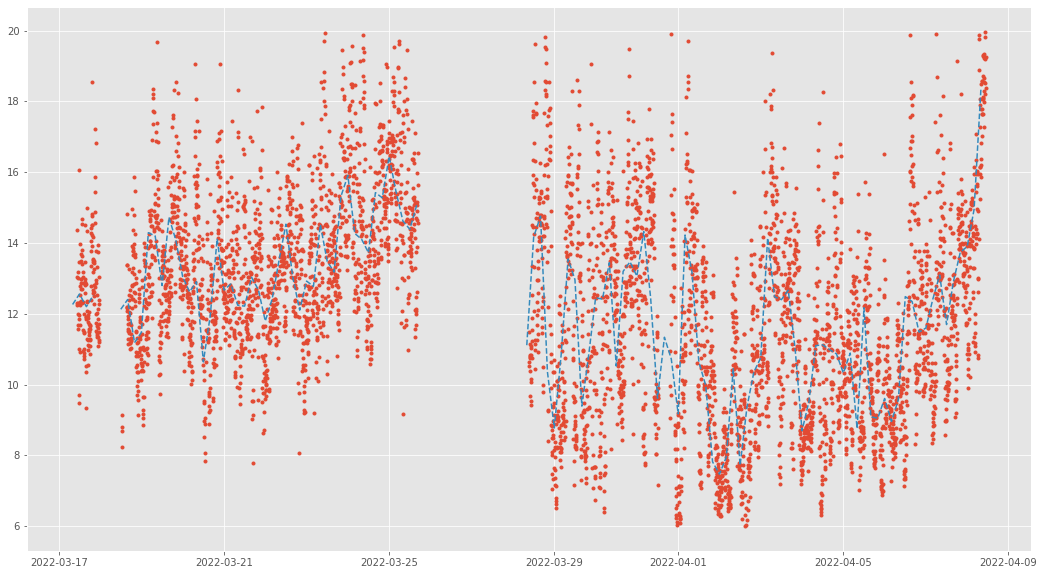

In [103]:
fig, ax = plt.subplots()
ax.plot(f80_mtr_5T_trim.rock_detected, '.', label='')
ax.plot(f80_mtr_240T.rock_detected, '--', label='')

In [104]:
f80_rckDete_norm = normalizate(f80_mtr_5T_trim)
f80_rckDete_median = f80_rckDete_norm.resample('240T').median()

lab_3mm_norm = normalizate(lab_dist_cum['+ m 6'])


In [105]:
lab_dist_cum.index[2]

Timestamp('2022-03-19 08:40:00')

In [106]:
f80_mtr_30TR=f80_mtr_T.rolling(120).median()

In [107]:
pd.Timestamp('2022-03-25 09:00:00')

Timestamp('2022-03-25 09:00:00')

In [108]:
from datetime import datetime, timedelta
DT=timedelta(minutes=60)

In [109]:
lab_dist_cum.index[2]+ DT - timedelta(minutes = lab_dist_cum.index[2].minute)

Timestamp('2022-03-19 09:00:00')

In [205]:
# s1 = f80_mtr_5T.f80[lab_dist_cum.index[0]]
from datetime import datetime, timedelta
DT=timedelta(minutes=60)

dt = lab_dist_cum.index[2:8]

s_dt = pd.DataFrame([], columns=['f10', 'f20', 'f30', 'f40', 'f50', 'f60', 'f70', 'f80', 'f90', 'f100', 'rock_detected'])
for t in dt:
    fs_t = f80_mean_60T.iloc[:,9::-1].loc[t+ DT - timedelta(minutes = t.minute)]
    fs_t['rock_detected'] = f80_mean_60T.rock_detected[t+ DT - timedelta(minutes = t.minute)]
    s_dt.loc[fs_t.name] = fs_t
    

s_dt.index = dt
s_dt

,f10,f20,f30,f40,f50,f60,f70,f80,f90,f100,rock_detected
2022-03-19 08:40:00,3.091403,3.829961,4.413914,4.964388,5.517403,6.090978,6.741993,7.518239,8.620743,12.490903,15.890395
2022-03-20 08:25:00,3.065443,3.787686,4.365759,4.908437,5.460512,6.037557,6.681868,7.462976,8.559245,12.349447,14.312047
2022-03-21 08:30:00,2.968299,3.652992,4.192997,4.700402,5.220536,5.779783,6.409767,7.151576,8.184729,11.550468,10.810072
2022-03-22 08:35:00,2.996326,3.687840,4.258225,4.786835,5.313123,5.864562,6.481395,7.247560,8.345659,12.022443,13.808496
2022-03-23 09:35:00,3.084977,3.865075,4.499741,5.073631,5.637724,6.236769,6.905734,7.717719,8.876670,13.244858,19.225544
2022-03-25 09:07:00,3.111871,3.865359,4.461264,5.009069,5.555268,6.134588,6.784329,7.560671,8.667536,12.415481,15.947523


In [206]:

# s_dt = [
# f80_mean_60T.rock_detected[lab_dist_cum.index[2]+ DT - timedelta(minutes = lab_dist_cum.index[2].minute)],
# f80_mean_60T.rock_detected[lab_dist_cum.index[3] + DT - timedelta(minutes = lab_dist_cum.index[3].minute)],
# f80_mean_60T.rock_detected[lab_dist_cum.index[4] + DT - timedelta(minutes = lab_dist_cum.index[4].minute)],
# f80_mean_60T.rock_detected[lab_dist_cum.index[5]+ DT - timedelta(minutes = lab_dist_cum.index[5].minute)],
# f80_mean_60T.rock_detected[lab_dist_cum.index[6]+ DT - timedelta(minutes = lab_dist_cum.index[6].minute)],
# f80_mean_60T.rock_detected[lab_dist_cum.index[7]+ DT - timedelta(minutes = lab_dist_cum.index[7].minute)]]

# s_dt = pd.DataFrame(s_dt, columns=["rock_detected"])
# s_dt.index = lab_dist_cum.index[2:8]
# s_dt

In [208]:
# s1 = f80_mtr_5T.f80[lab_dist_cum.index[0]]
from datetime import datetime, timedelta
DT=timedelta(minutes=60)

dt = lab_dist_cum.index[11:18]

s_test = pd.DataFrame([], columns=['f10', 'f20', 'f30', 'f40', 'f50', 'f60', 'f70', 'f80', 'f90', 'f100', 'rock_detected'])
for t in dt:
    fs_t = f80_mean_60T.iloc[:,9::-1].loc[t+ DT - timedelta(minutes = t.minute)]
    fs_t['rock_detected'] = f80_mean_60T.rock_detected[t+ DT - timedelta(minutes = t.minute)]
    s_test.loc[fs_t.name] = fs_t
    

s_test.index = dt
s_test

,f10,f20,f30,f40,f50,f60,f70,f80,f90,f100,rock_detected
2022-03-29 08:30:00,2.949091,3.633743,4.172812,4.663916,5.155960,5.680681,6.279511,7.018525,8.066376,11.593929,14.916250
2022-03-30 08:25:00,3.041260,3.739117,4.285355,4.789291,5.298411,5.831174,6.418952,7.140240,8.185731,11.640427,13.867546
2022-04-03 09:05:00,3.100469,3.820682,4.373963,4.894354,5.425262,5.990378,6.612962,7.358517,8.405501,11.567094,10.174958
2022-04-04 09:00:00,3.132754,3.864849,4.441654,4.971632,5.484971,6.023078,6.638799,7.382633,8.413556,11.421427,8.623313
2022-04-05 08:50:00,3.091761,3.825105,4.386986,4.897696,5.406108,5.941853,6.528925,7.227292,8.195384,10.944951,8.277472
2022-04-06 08:05:00,3.022356,3.696497,4.221806,4.704780,5.186741,5.707849,6.310587,7.061716,8.087660,11.077817,9.729543
2022-04-07 08:45:00,3.187884,3.951276,4.543735,5.099822,5.651380,6.228981,6.865488,7.621028,8.699983,12.084098,14.312555


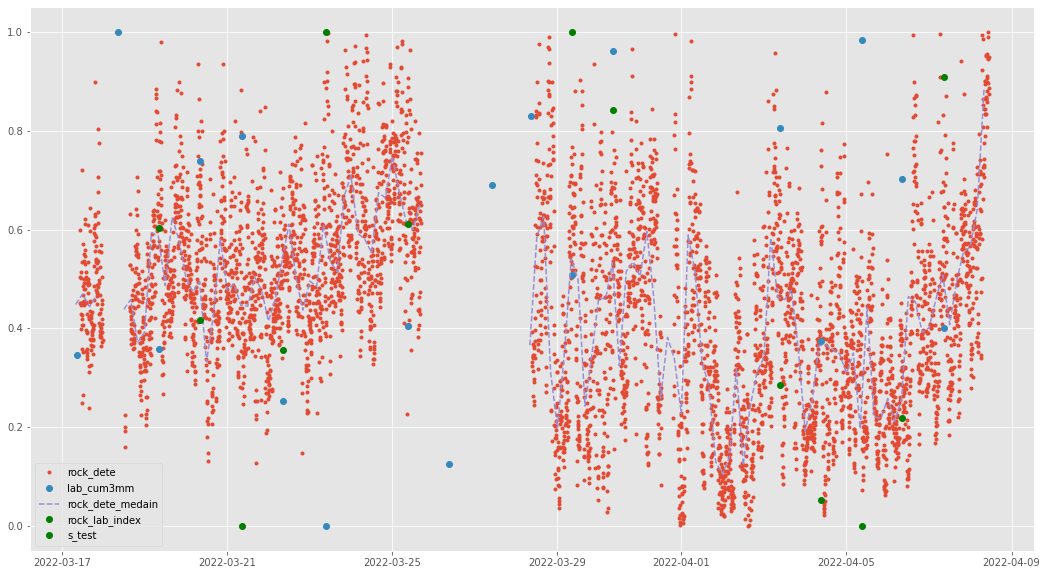

In [210]:
s_norm = normalizate(s_dt.rock_detected)
s_test_norm = normalizate(s_test.rock_detected)

fig, ax = plt.subplots()
ax.plot(f80_rckDete_norm.rock_detected, '.', label='rock_dete')
ax.plot(lab_3mm_norm, 'o', label='lab_cum3mm')
ax.plot(f80_rckDete_median.rock_detected, '--', label='rock_dete_medain')
ax.plot(s_norm, 'go', label='rock_lab_index')
ax.plot(s_test_norm, 'go', label='s_test')
ax.legend()

C:\Users\Ivan\.conda\envs\f80-2\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  This is separate from the ipykernel package so we can avoid doing imports until


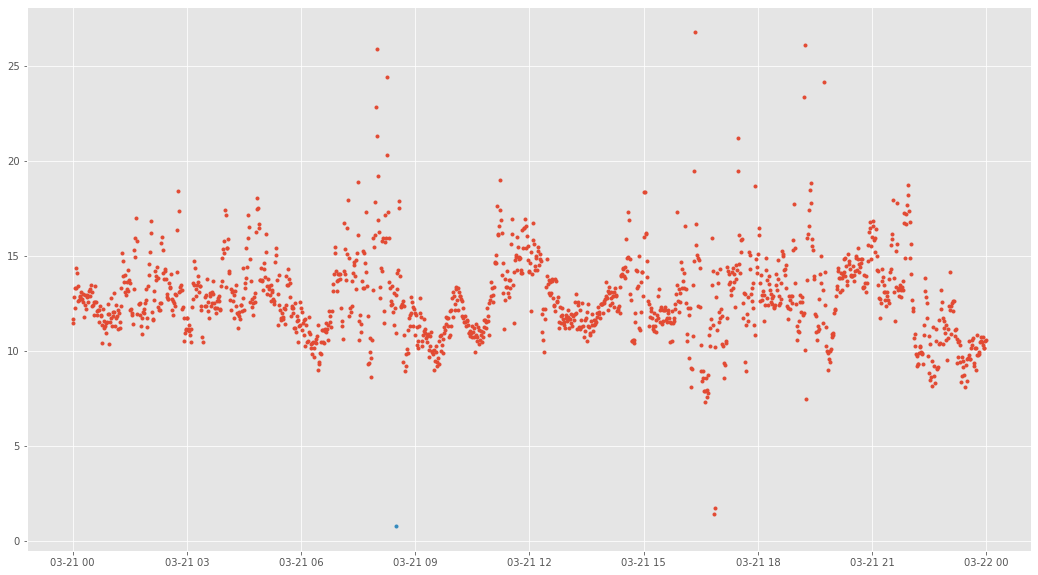

In [220]:
fig, ax = plt.subplots()
ax.plot(f80_mtr_T.rock_detected['2022-03-21'], '.')
ax.plot(lab_dist_cum['+ m 6']['2022-03-21'], '.')

In [211]:
new_data = pd.DataFrame()
new_data['lab_3mm'] = lab_dist_cum['+ m 6']['2022-03-19':'2022-03-25']
new_data['f80_rockdete'] = s_dt.rock_detected
new_data

,lab_3mm,f80_rockdete
2022-03-19 08:40:00,0.681790,15.890395
2022-03-20 08:25:00,0.753624,14.312047
2022-03-21 08:30:00,0.763346,10.810072
2022-03-22 08:35:00,0.661790,13.808496
2022-03-23 09:35:00,0.614134,19.225544
2022-03-25 09:07:00,0.690735,15.947523


In [212]:
data_test = pd.DataFrame()
data_test['lab_3mm'] = lab_dist_cum['+ m 6']['2022-03-29':'2022-04-08']
data_test['f80_rockdete'] = s_test.rock_detected
data_test

,lab_3mm,f80_rockdete
2022-03-29 08:30:00,0.710221,14.916250
2022-03-30 08:25:00,0.795700,13.867546
2022-04-03 09:05:00,0.766080,10.174958
2022-04-04 09:00:00,0.684729,8.623313
2022-04-05 08:50:00,0.799962,8.277472
2022-04-06 08:05:00,0.746885,9.729543
2022-04-07 08:45:00,0.689884,14.312555


In [213]:
from scipy.stats import pearsonr

corr, _ = pearsonr(new_data['lab_3mm'], new_data['f80_rockdete'])
print('Pearsons correlation: %.3f' % corr)

Pearsons correlation: -0.818


In [214]:
corr, _ = pearsonr(data_test['lab_3mm'], data_test['f80_rockdete'])
print('Pearsons correlation: %.3f' % corr)

Pearsons correlation: -0.232


In [215]:
xs = new_data['f80_rockdete'].values
xs

array([15.89039493, 14.31204718, 10.81007199, 13.80849559, 19.225544  ,
       15.9475229 ])

In [216]:
y  = new_data['lab_3mm'].values
y

array([0.68178967, 0.75362392, 0.76334555, 0.66179049, 0.61413361,
       0.69073527])

In [119]:
from scipy.optimize import curve_fit
import statsmodels.api as sm

In [120]:
Xs_exp      =sm.add_constant(xs,prepend=True)

# y = rr_lab['b_lab'].values

model      =sm.OLS(y, Xs_exp)
linear_reg_n = model.fit()

# Pendiente / Slope 
linear_reg_n.params

array([ 0.94219361, -0.01653157])

In [121]:
linear_reg_n.summary()

C:\Users\Ivan\.conda\envs\f80-2\lib\site-packages\statsmodels\stats\stattools.py:75: ValueWarning: omni_normtest is not valid with less than 8 observations; 6 samples were given.
  "samples were given." % int(n), ValueWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.669
Model:                            OLS   Adj. R-squared:                  0.586
Method:                 Least Squares   F-statistic:                     8.070
Date:                Tue, 19 Apr 2022   Prob (F-statistic):             0.0468
Time:                        11:16:42   Log-Likelihood:                 12.592
No. Observations:                   6   AIC:                            -21.18
Df Residuals:                       4   BIC:                            -21.60
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.9422      0.089     10.642      0.000       0.696       1.188
x1            -0.0165      0.006     -2.841      0.047      -0.033      -0.000
==============================================================================
Omnibus:                          nan   Durbin-Watson:                   1.774
Prob(Omnibus):                    nan   Jarque-Bera (JB):                0.054
Skew:                          -0.192   Prob(JB):                        0.973
Kurtosis:                       2.739   Cond. No.                         91.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [122]:
import seaborn as sns

In [123]:
y_prima = linear_reg_n.params[0] + linear_reg_n.params[1]*xs
y_prima = pd.DataFrame(y_prima, columns=["y_prim"])
y_prima.index = s_dt['2022-03-19':'2022-03-25'].index
y_prima

,y_prim
2022-03-19 08:40:00,0.679500
2022-03-20 08:25:00,0.705593
2022-03-21 08:30:00,0.763486
2022-03-22 08:35:00,0.713918
2022-03-23 09:35:00,0.624365
2022-03-25 09:07:00,0.678556


In [202]:
y_test = linear_reg_n.params[0] + linear_reg_n.params[1]*data_test['f80_rockdete']
y_test

2022-03-29 08:30:00    0.695605
2022-03-30 08:25:00    0.712941
2022-04-03 09:05:00    0.773986
2022-04-04 09:00:00    0.799637
2022-04-05 08:50:00    0.805354
2022-04-06 08:05:00    0.781349
2022-04-07 08:45:00    0.705585
Name: f80_rockdete, dtype: float64

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


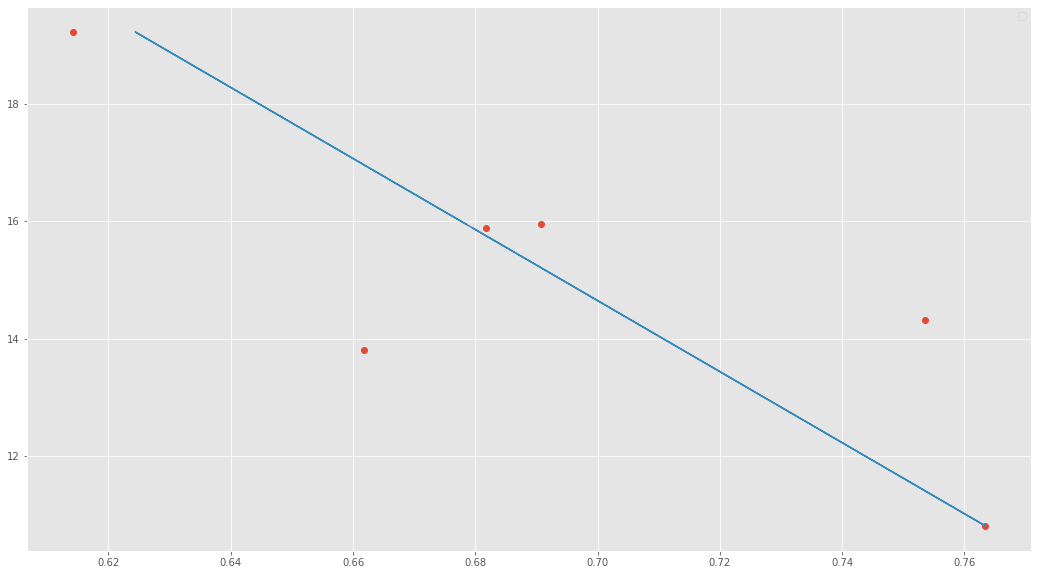

In [203]:
fig, ax = plt.subplots()
ax.plot(y, xs, 'o')
ax.plot(y_prima, xs, '-')

ax.legend()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


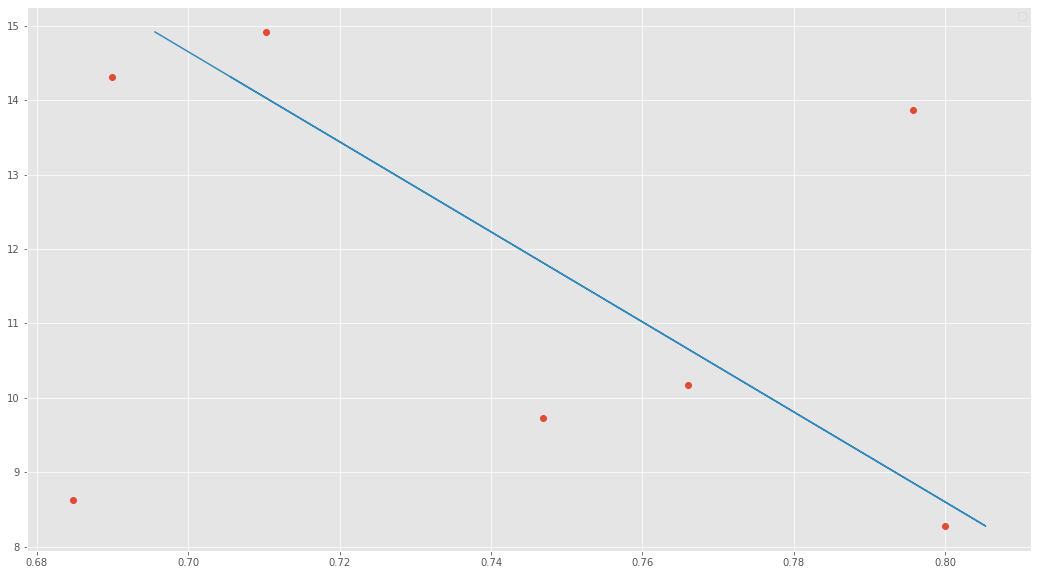

In [204]:
fig, ax = plt.subplots()
ax.plot(data_test['lab_3mm'], data_test['f80_rockdete'], 'o')
ax.plot(y_test, data_test['f80_rockdete'], '-')

ax.legend()

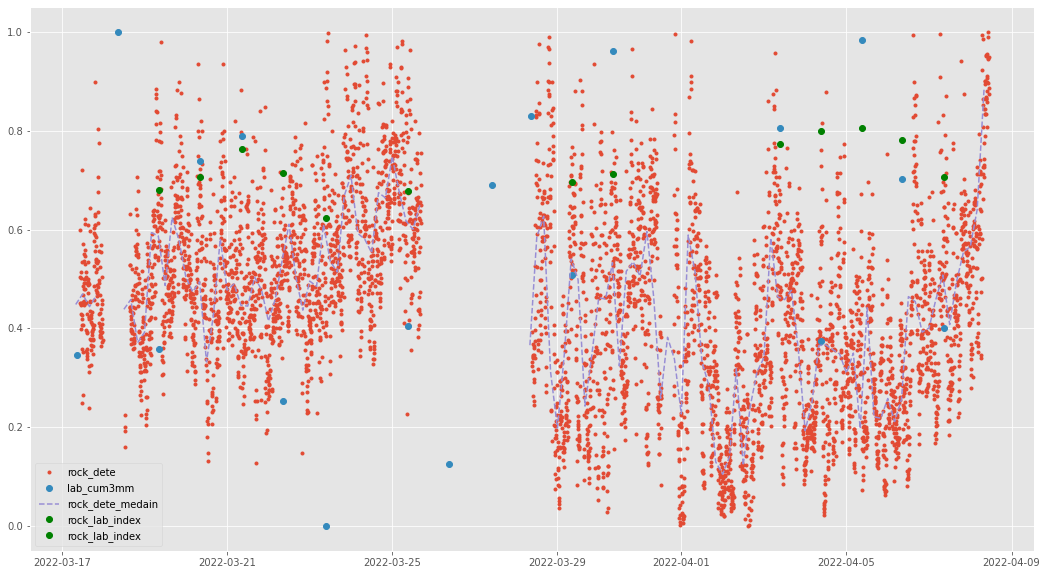

In [168]:
lab_3mm_norm_2 = lab_3mm_norm*0.2
lab_3mm_norm_2 = lab_3mm_norm_2+0.4

fig, ax = plt.subplots()
ax.plot(f80_rckDete_norm.rock_detected, '.', label='rock_dete')
ax.plot(lab_3mm_norm, 'o', label='lab_cum3mm')
ax.plot(f80_rckDete_median.rock_detected, '--', label='rock_dete_medain')
ax.plot(y_prima, 'go', label='rock_lab_index')
ax.plot(y_test, 'go', label='rock_lab_index')
ax.legend()

In [166]:
# s1 = f80_mtr_5T.f80[lab_dist_cum.index[0]]
from datetime import datetime, timedelta
DT=timedelta(minutes=60)

dt = lab_dist_cum.index[2:8]


fs_dt = pd.DataFrame([], columns=['f10', 'f20', 'f30', 'f40', 'f50', 'f60', 'f70', 'f80', 'f90', 'f100'])
for t in dt:
    fs_t = f80_mean_60T.iloc[:,9::-1].loc[t+ DT - timedelta(minutes = t.minute)]
    fs_dt.loc[fs_t.name] = fs_t

# fs_dt = pd.DataFrame(fs_dt, columns=["rock_detected"])
# fs_dt.index = lab_dist_cum.index[2:8]
# fs_dt
fs_dt

,f10,f20,f30,f40,f50,f60,f70,f80,f90,f100
2022-03-19 09:00:00,3.091403,3.829961,4.413914,4.964388,5.517403,6.090978,6.741993,7.518239,8.620743,12.490903
2022-03-20 09:00:00,3.065443,3.787686,4.365759,4.908437,5.460512,6.037557,6.681868,7.462976,8.559245,12.349447
2022-03-21 09:00:00,2.968299,3.652992,4.192997,4.700402,5.220536,5.779783,6.409767,7.151576,8.184729,11.550468
2022-03-22 09:00:00,2.996326,3.687840,4.258225,4.786835,5.313123,5.864562,6.481395,7.247560,8.345659,12.022443
2022-03-23 10:00:00,3.084977,3.865075,4.499741,5.073631,5.637724,6.236769,6.905734,7.717719,8.876670,13.244858
2022-03-25 10:00:00,3.111871,3.865359,4.461264,5.009069,5.555268,6.134588,6.784329,7.560671,8.667536,12.415481


In [160]:
def ESC_FF(Arr, FF):
    l=len(Arr)
    step=(100-FF)/(l)
    #print(np.arange(0, 100-FF, step))
    return 100 - np.arange(0, 100-FF, step)

In [161]:
acum_ajustado = []
for i in range(fs_dt.shape[0]):
    F_dExpt =ESC_FF(list(fs_dt.iloc[i]), float(y_prima.iloc[i]*100))
    acum_ajustado.append(F_dExpt)

In [162]:
acum_ajustado[0]

array([100.        ,  96.79500473,  93.59000946,  90.38501418,
        87.18001891,  83.97502364,  80.77002837,  77.5650331 ,
        74.36003783,  71.15504255])

In [163]:
bsize  = np.multiply(dsize, .001)
bsize

array([ 0.038,  0.045,  0.053,  0.075,  0.106,  0.15 ,  0.212,  0.3  ,
        0.425,  0.85 ,  1.18 ,  2.   ,  2.36 ,  3.35 ,  4.75 ,  6.3  ,
        9.5  , 12.5  ])

In [164]:
fs_dt.iloc[0].name , lab_dist_cum.iloc[2,:-1].name

(Timestamp('2022-03-19 09:00:00'), Timestamp('2022-03-19 08:40:00'))

2022-03-19 08:40:00
2022-03-19 09:00:00


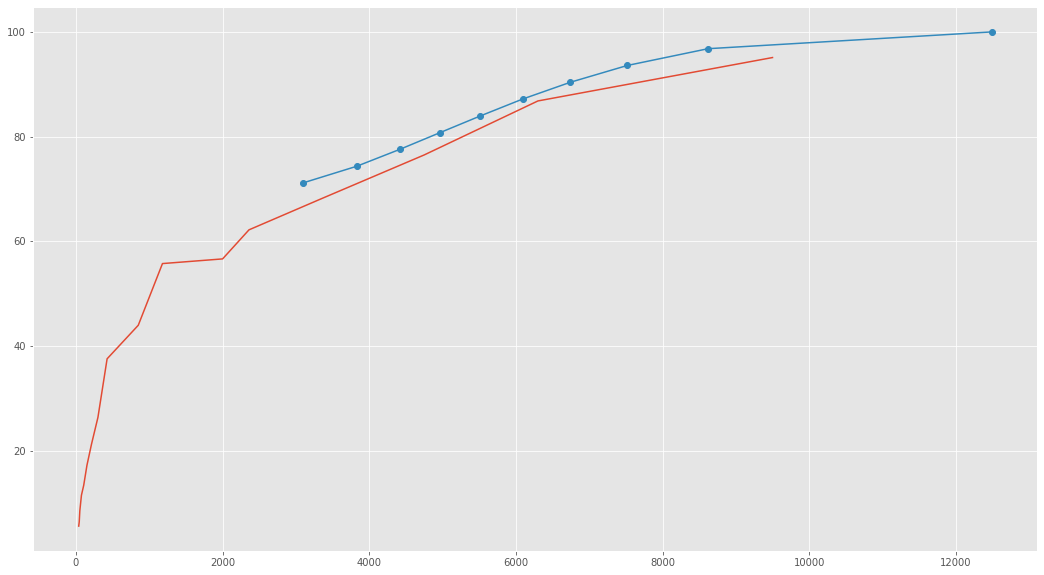

In [165]:
fig, ax = plt.subplots()
# for i in range(fs_dt.shape[0]):
#     ax.plot(list(fs_dt.iloc[i]), acum_ajustado[i][::-1], '-o')
i = 0
ax.plot(dsize[:-1], np.multiply(lab_dist_cum.iloc[i+2,1:-1], 100), label = 'exp_lab')
ax.plot(np.multiply(fs_dt.iloc[i], 1000), acum_ajustado[i][::-1], '-o')
print(lab_dist_cum.index[2])
print(fs_dt.index[0])

In [136]:
def RR(s:pd.Series, dsize) -> list:
    #dsize: np.array
    # Size and Cumulative Function 
    sizes = dsize#25.4*np.array([1.5, 2, 2.5, 3, 4, 6])

    #F_Acum y d(size) total para predicción, en donde se consideran todos los datos
    F_dExpt     = s
    d_Expt      = sizes #np.array([304.8, 355.6,254, 203.2, 152.4, 101.6, 76.2, 63.5, 50.8, 38.1, 31.75, 25.4])
    
    # Estas variables se usan para el calculo, quitando los acumulados a 100%

    F_dExp     = F_dExpt[F_dExpt<100].values

    if len(F_dExp)<6:
        return [len(F_dExp),0]
    else:    
        d_Exp      = d_Expt[len(F_dExpt)-len(F_dExp) : ]

        ### AJUSTE FUNCIÓN ROSIN - RAMMLER
    #Linear Transformation Ln - Ln
        Y_Fd       = np.log(np.log(1/(1-(F_dExp/100))))
        X_d        = np.log(d_Exp)

        #OLS - Minimos Cuadrados Ordinarios
        X_dEX      =sm.add_constant(X_d,prepend=True)
        model      =sm.OLS(Y_Fd,X_dEX)
        linear_reg = model.fit()

        # Pendiente / Slope 
        m          = linear_reg.params[1]
        # Intercepto / Intercept
        b          = linear_reg.params[0]
        #Param - Exponent 'd'
        d         =np.exp(-b/m)

        # Ln -Ln  %F(d) Ajustado
        Y_FdAdj  = m*X_d + b

        #Predicción Ajustada RLS - Regresión Lineal Simple
        F_dAdj      = 100*(1-np.exp(-np.power(d_Exp/d,m)))
        return [m, d, F_dAdj, F_dExp]

In [137]:
lab_dist_cum.iloc[i+2,:-1]

-m 400     0.050463
+m 400     0.056761
+m 325     0.065118
+m 270     0.086020
+m 200     0.115681
+m 140     0.134677
+ m 100    0.172743
+ m 70     0.212993
+ m 50     0.264310
+ m 40     0.376051
+ m 20     0.440064
+ m 16     0.557828
+ m 10     0.566736
+ m 8      0.622218
+ m 6      0.681790
+ m 4      0.765200
0.25       0.868209
0.375      0.951068
Name: 2022-03-19 08:40:00, dtype: float64

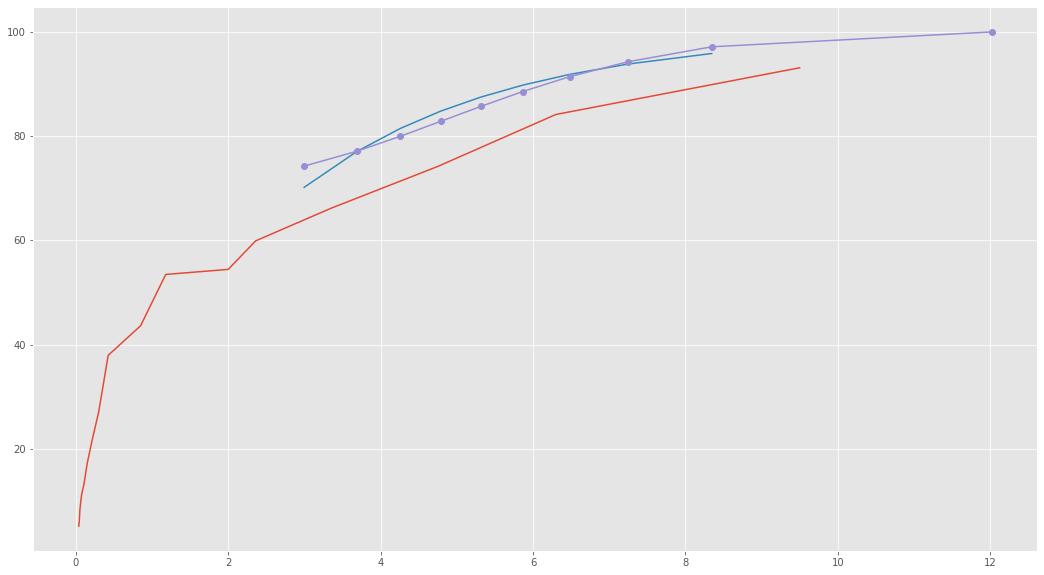

In [138]:
i = 0
rr_f80_ar = []
for i in range(fs_dt.shape[0]):
    rr_f80 = RR(pd.DataFrame(acum_ajustado[i][:0:-1]), np.multiply(fs_dt.iloc[i][:-1], 1000))
    rr_f80_ar.append(rr_f80)
i = 3

fig, ax = plt.subplots()
# for i in range(fs_dt.shape[0]):
#     ax.plot(list(fs_dt.iloc[i]), acum_ajustado[i][::-1], '-o')
ax.plot(bsize[:-1], np.multiply(lab_dist_cum.iloc[i+2,1:-1], 100), '-', label='f80_results')
ax.plot(fs_dt.iloc[i][:-1], rr_f80_ar[i][2],  '-', label='rr_f80results')
ax.plot(list(fs_dt.iloc[i]), acum_ajustado[i][::-1], '-o')

In [139]:
# RR_Ajustado = RR(lab_dist_cum.iloc[0,1:-1], dsize[1:-1])
RR_lab_ar = []
for i in range(lab_dist_cum.shape[0]):
    RR_Ajustado = RR(np.multiply(lab_dist_cum.iloc[i,1:-1], 100), dsize[:-1])
    RR_lab_ar.append(RR_Ajustado)

RR_lab_ar = pd.DataFrame(RR_lab_ar, columns = ['n', 'b', 'data_Ajstda', 'data_real'])
RR_lab_ar.index = lab_dist_cum.index
RR_lab_ar.head()

,n,b,data_Ajstda,data_real
2022-03-17 09:00:00,0.611499,1969.282959,"[8.556414645210154, 9.443024096656337, 10.3833...","[6.523212895774224, 7.6706756722826235, 10.751..."
2022-03-18 08:45:00,0.688422,1397.113631,"[8.021953331800491, 8.966478944677537, 9.98048...","[6.325905851651109, 7.392351701294792, 10.0245..."
2022-03-19 08:40:00,0.654411,2105.461259,"[6.972577218584075, 7.755917390959343, 8.59378...","[5.676143635040526, 6.511756292188402, 8.60204..."
2022-03-20 08:25:00,0.691852,1652.856948,"[7.088678786586611, 7.932532107336243, 8.84010...","[5.793248733510559, 6.625871495209912, 8.83533..."
2022-03-21 08:30:00,0.622895,1553.699180,"[9.43641956701703, 10.427903525445492, 11.4801...","[7.309295435142871, 8.130367096871389, 11.5326..."


In [140]:
rr_l = RR_lab_ar.loc['2022-03-19':'2022-03-25']
rr_l

,n,b,data_Ajstda,data_real
2022-03-19 08:40:00,0.654411,2105.461259,"[6.972577218584075, 7.755917390959343, 8.59378...","[5.676143635040526, 6.511756292188402, 8.60204..."
2022-03-20 08:25:00,0.691852,1652.856948,"[7.088678786586611, 7.932532107336243, 8.84010...","[5.793248733510559, 6.625871495209912, 8.83533..."
2022-03-21 08:30:00,0.622895,1553.699180,"[9.43641956701703, 10.427903525445492, 11.4801...","[7.309295435142871, 8.130367096871389, 11.5326..."
2022-03-22 08:35:00,0.645131,2297.674698,"[6.845240518558593, 7.6033970232968535, 8.4133...","[5.210159811632684, 6.061820550072642, 8.28615..."
2022-03-23 09:35:00,0.651147,2698.643806,"[6.0399379540282405, 6.718748036935862, 7.4453...","[5.119603267211202, 6.053092182030339, 7.92736..."
2022-03-25 09:07:00,0.609384,1899.642095,"[8.80759933255334, 9.71552723172624, 10.677901...","[7.072905331882481, 8.30094823565988, 10.92025..."


In [141]:
np.multiply(fs_dt.iloc[0][:-1], 1000).shape, rr_f80_ar[0][2].shape

((9,), (9,))

2022-03-19 08:40:00
2022-03-19 09:00:00


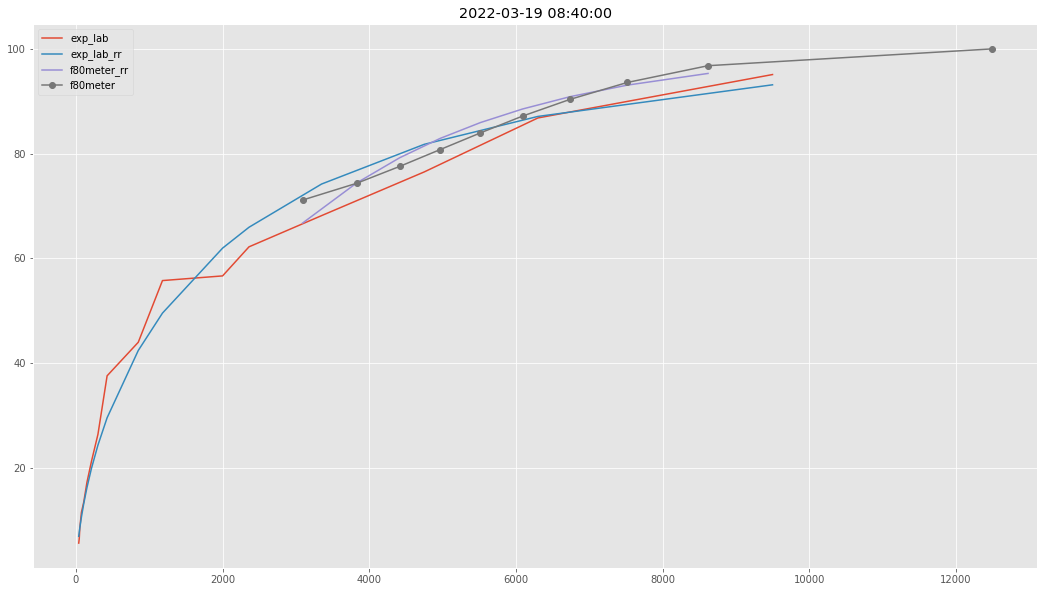

In [142]:
lab_dist = lab_dist_cum.loc['2022-03-19':'2022-03-25']
rr_l = RR_lab_ar.loc['2022-03-19':'2022-03-25']
i = 0
fig, ax = plt.subplots()
ax.plot(dsize[:-1], np.multiply(lab_dist.iloc[i,1:-1], 100), label = 'exp_lab')
ax.plot(dsize[:-1], rr_l.iloc[i,2], label = 'exp_lab_rr')
ax.plot(np.multiply(fs_dt.iloc[i][:-1], 1000), rr_f80_ar[i][2],  '-', label='f80meter_rr')
ax.plot(np.multiply(fs_dt.iloc[i],1000), acum_ajustado[i][::-1], '-o', label = 'f80meter')
ax.set_title(lab_dist.iloc[i].name)
ax.legend()
print(lab_dist.index[i])
print(fs_dt.index[i])

In [143]:
i  = 1 + 2*4

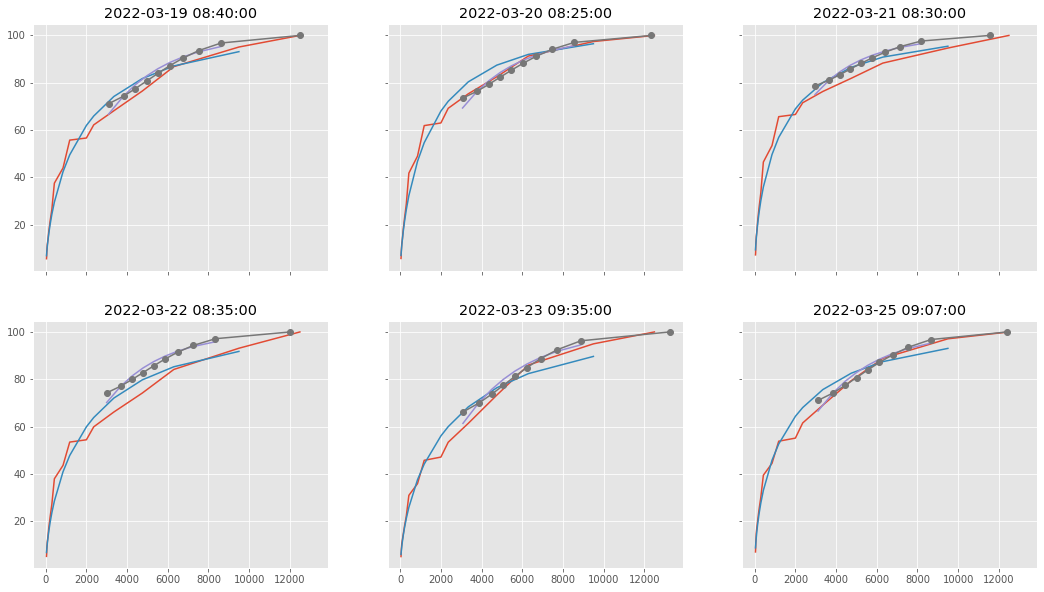

In [144]:
fig, ax = plt.subplots(2, 3, sharex=True, sharey=True)
for row in range(2):
    for col in range(3):
        i  = col + row*3
        ax[row,col].plot(dsize[:], np.multiply(lab_dist.iloc[i,1:], 100), label = 'exp_lab')
        ax[row,col].plot(dsize[:-1], rr_l.iloc[i,2], label = 'exp_lab_rr')
        ax[row,col].plot(np.multiply(fs_dt.iloc[i][:-1], 1000), rr_f80_ar[i][2],  '-', label='f80meter')
        ax[row,col].plot(np.multiply(fs_dt.iloc[i],1000), acum_ajustado[i][::-1], '-o', label = 'f80meter')
        ax[row,col].set_title(lab_dist.iloc[i].name)

In [145]:
for row in range(6):
    

SyntaxError: unexpected EOF while parsing (3031719623.py, line 2)

In [ ]:
data_csv = fs_dt.copy()
data_csv['factor_finos'] = y_prima.values
data_csv.to_csv('./curva_ajustada_cerrolindo.csv')

2022-03-25 09:07:00
2022-03-25 10:00:00


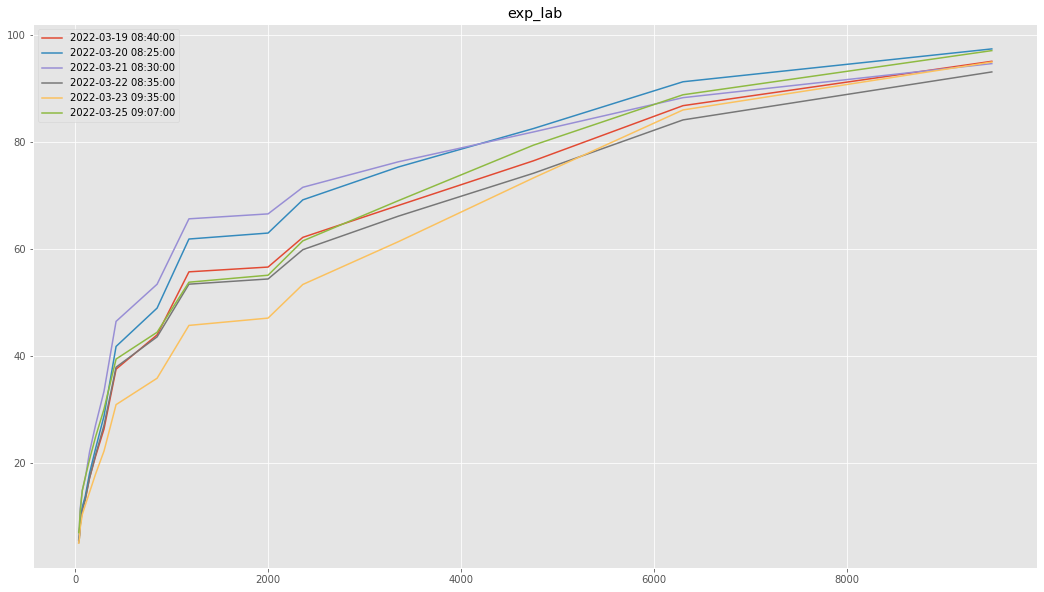

In [ ]:

fig, ax = plt.subplots()
for i in range(lab_dist.shape[0]):
    ax.plot(dsize[:-1], np.multiply(lab_dist.iloc[i,1:-1], 100), label = lab_dist.iloc[i].name)
    # ax.plot(dsize[:-1], rr_l.iloc[i,2], label = 'exp_lab_rr')
    # ax.plot(np.multiply(fs_dt.iloc[i][:-1], 1000), rr_f80_ar[i][2],  '-', label='f80meter')
    # ax.plot(np.multiply(fs_dt.iloc[i],1000), acum_ajustado[i][::-1], '-o', label = lab_dist.iloc[i].name)
ax.set_title('exp_lab')
ax.legend()
print(lab_dist.index[i])
print(fs_dt.index[i])

In [ ]:
rr_f80_rslts = [[n , b] for n, b, _ , _ in rr_f80_ar]
rr_f80_rslts = pd.DataFrame(rr_f80_rslts, columns = ['n', 'b'])
rr_f80_rslts

,n,b
0,0.996719,2805.480732
1,0.952669,2571.283258
2,0.870088,2034.609487
3,0.944276,2448.384592
4,1.056076,3234.654225
5,1.000763,2838.381076


In [ ]:
rr_lab_rslts = [[n , b] for n, b, _ , _ in rr_l.iloc]
rr_lab_rslts = pd.DataFrame(rr_lab_rslts, columns = ['n', 'b'])
rr_lab_rslts

,n,b
0,0.654411,2105.461259
1,0.691852,1652.856948
2,0.622895,1553.699180
3,0.645131,2297.674698
4,0.651147,2698.643806
5,0.609384,1899.642095


In [ ]:
xs_f80 = rr_f80_rslts

In [ ]:
y_lab =  rr_lab_rslts['b']

In [ ]:
Xs_exp      =sm.add_constant(xs_f80,prepend=True)

# y = rr_lab['b_lab'].values

model      =sm.OLS(y_lab, Xs_exp)
linear_reg_n = model.fit()

# Pendiente / Slope 
linear_reg_n.params

const   -13104.215375
n        23406.448757
b           -2.849852
dtype: float64

In [ ]:
linear_reg_n.summary()

C:\Users\Ivan\.conda\envs\f80-2\lib\site-packages\statsmodels\stats\stattools.py:75: ValueWarning: omni_normtest is not valid with less than 8 observations; 6 samples were given.
  "samples were given." % int(n), ValueWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      b   R-squared:                       0.618
Model:                            OLS   Adj. R-squared:                  0.364
Method:                 Least Squares   F-statistic:                     2.429
Date:                Mon, 18 Apr 2022   Prob (F-statistic):              0.236
Time:                        08:16:59   Log-Likelihood:                -41.414
No. Observations:                   6   AIC:                             88.83
Df Residuals:                       3   BIC:                             88.20
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -1.31e+04   1.87e+04     -0.702      0.533   -7.25e+04    4.63e+04
n           2.341e+04   3.34e+04      0.701      0.534   -8.28e+04     1.3e+05
b             -2.8499      5.194     -0.549      0.621     -19.380      13.680
==============================================================================
Omnibus:                          nan   Durbin-Watson:                   1.547
Prob(Omnibus):                    nan   Jarque-Bera (JB):                0.619
Skew:                           0.018   Prob(JB):                        0.734
Kurtosis:                       1.427   Cond. No.                     7.38e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.38e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


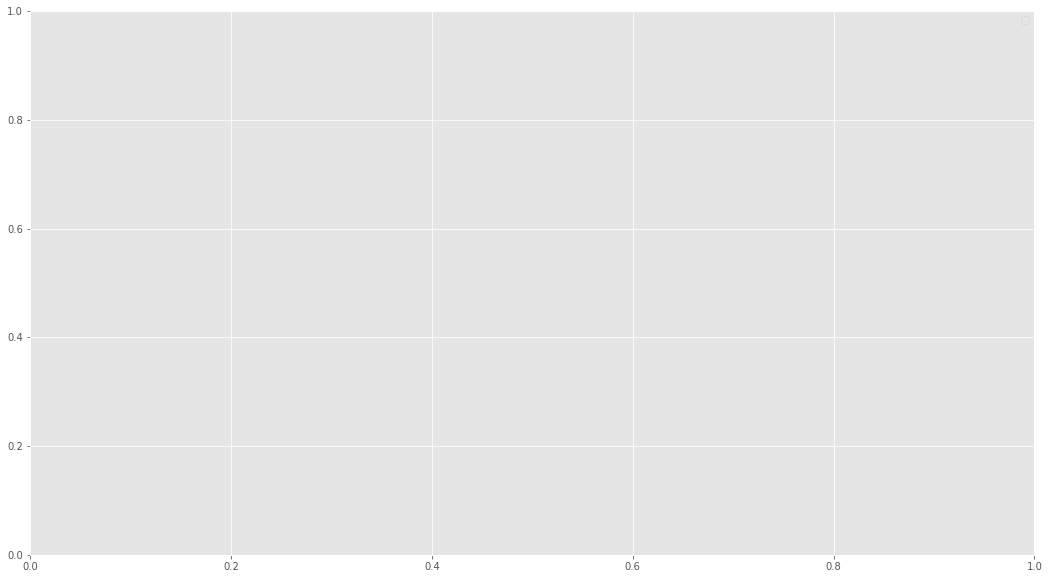

In [ ]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.legend()